## Linear model for stage wise difference

In [36]:
class linear_regression():
    
    def __init__(self,adata):
        self.adata = adata
        self.df = adata.obs
        self.X_exp = adata.X
        self.LR_dict = {}
    
    def celltype_organ(self, anno_key, celltype, others=['organ','method']):
        from sklearn.linear_model import Ridge
        
        self.df['is_%s'%celltype] = [str(x) for x in self.df[anno_key]==celltype] # cell type term
        self.df['%s_organ'%celltype] = [x+'_'+y for x,y in zip(self.df['is_%s'%celltype],self.df['organ'])] # interaction term
        cat = self.df[['is_%s'%celltype, '%s_organ'%celltype] + others] # add organ term and others
        LR = Ridge()
        dummy = pd.get_dummies(cat, drop_first=False)
        LR.fit(dummy, self.X_exp)
        params = list(dummy.columns)
        ct_dict = {'LR': LR, 'params': params}
        self.LR_dict[celltype] = ct_dict
        
    def celltype_organ_2(self, anno_key, celltype, others=['method']):
        from sklearn.linear_model import Ridge
        
        self.df['is_%s'%celltype] = [str(x) for x in self.df[anno_key]==celltype] # cell type term
        self.df['%s_organ'%celltype] = [x+'_'+y for x,y in zip(self.df['is_%s'%celltype],self.df['organ'])] # interaction term
        cat = self.df[['%s_organ'%celltype] + others] # add organ term and others
        LR = Ridge()
        dummy = pd.get_dummies(cat, drop_first=False)
        LR.fit(dummy, self.X_exp)
        params = list(dummy.columns)
        ct_dict = {'LR': LR, 'params': params}
        self.LR_dict[celltype] = ct_dict
    
    def show_param_genes(self, celltype, param, toshow=20, output=False):
        coef = self.LR_dict[celltype]['LR'].coef_[:,self.LR_dict[celltype]['params'].index(param)]
        order = np.argsort(-coef)
        names = adata.var_names[order][:toshow]
        values = coef[order][:toshow]
        print(['%s:%.2f'%(x,y) for x,y in zip(names,values)])
        if output:
            return names, values
    
    def violin_plot(self, celltype, gene):
        LR = self.LR_dict[celltype]['LR']
        params = self.LR_dict[celltype]['params']
        
        Exp = self.adata.raw.X
        exp = Exp[:,self.adata.raw.var_names==gene].todense().A1

        self.df[gene+'_exp'] = exp

        fig = plt.figure(figsize=(8,2))
        ax = plt.subplot(111)
        sns.violinplot(x='is_%s'%(celltype),y=gene+'_exp',
                       hue='organ',data = self.df,
                       scale='width',linewidth=0,inner=None,rasterized=True,cut=0,ax=ax)
        plt.xticks(rotation=0)
        plt.grid(False)
        plt.xlabel('')
        ax.legend(bbox_to_anchor=(1.2, 1.05))
        plt.show()

        gidx = self.adata.var_names==gene

        cf = LR.coef_[gidx][0]
        cf_idx = np.argsort(-cf)
        print('\n'.join(['%.2f : %s'%(a,b) for a,b in zip(cf[cf_idx],np.array(params)[cf_idx])]))


In [37]:
lr = linear_regression(adata)

In [38]:
for ct in ['NK','CD4+T','CD8+T','Treg','ILC3','B_naive']:
    lr.celltype_organ('anno_TH_predict_major',ct)

In [332]:
lr.show_param_genes('ILC3','ILC3_organ_True_TH')

['RTN1:1.09', 'LMNA:0.63', 'PDE1C:0.57', 'ARHGEF10:0.52', 'KRT1:0.49', 'RASSF8:0.49', 'PRL:0.49', 'LSR:0.47', 'CTSW:0.47', 'RP5-832C2.5:0.47', 'SNX25:0.45', 'CTSV:0.44', 'RAB25:0.44', 'ITGB7:0.40', 'DONSON:0.40', 'MAP4K3:0.40', 'IL17RE:0.38', 'IL26:0.38', 'ALOX5AP:0.38', 'CREM:0.37']


In [394]:
lr.show_param_genes('B_naive','B_naive_organ_True_TH')

['CCL22:1.47', 'CTSH:1.38', 'RASGRP3:1.22', 'IGHG1:1.09', 'IGHG3:1.08', 'TVP23A:1.05', 'EBI3:0.93', 'ENTPD1:0.76', 'IGHA1:0.75', 'IFI44L:0.73', 'TFEB:0.72', 'HMSD:0.72', 'CCL17:0.71', 'ADAM28:0.71', 'RGS1:0.69', 'HILPDA:0.69', 'CLECL1:0.69', 'FCRL5:0.67', 'TNFRSF13B:0.66', 'COL19A1:0.65']


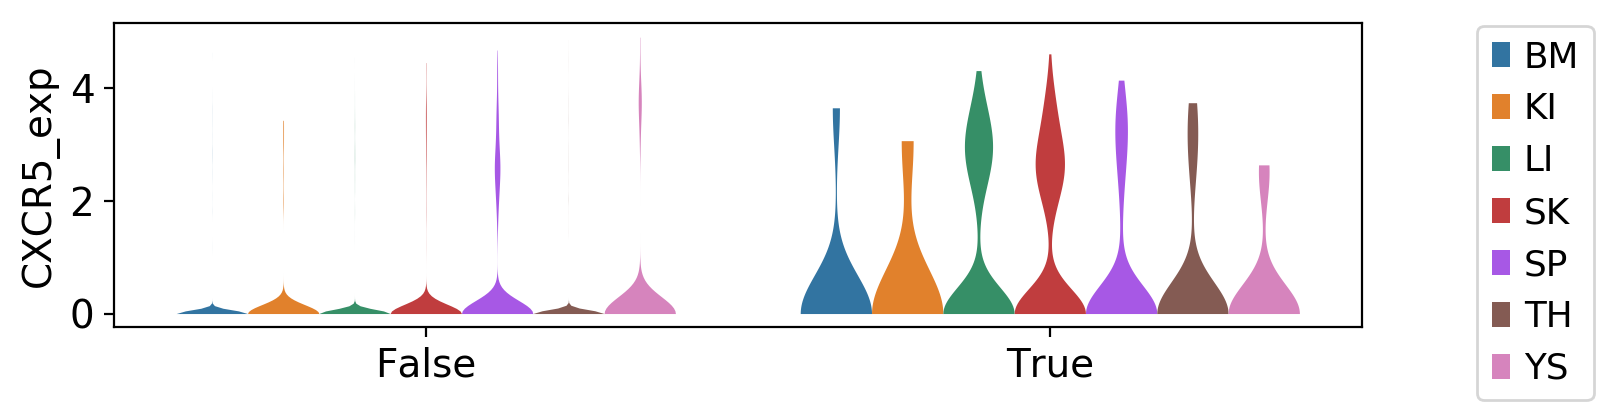

IndexError: index 0 is out of bounds for axis 0 with size 0

In [45]:
ct,gene = 'ILC3','CXCR5'

lr.violin_plot(ct,gene)

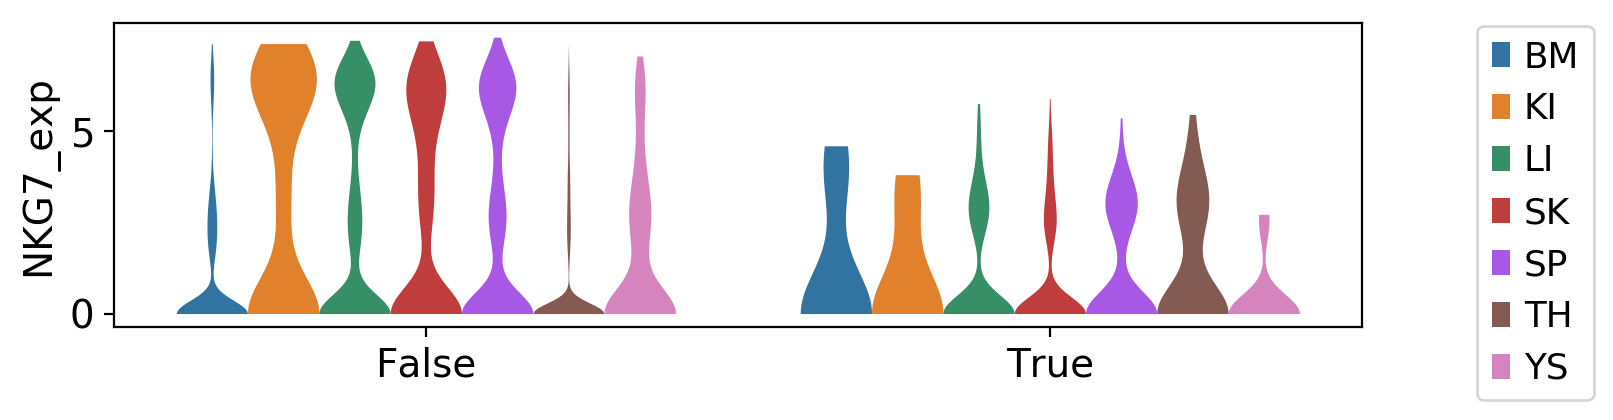

IndexError: index 0 is out of bounds for axis 0 with size 0

In [46]:
ct,gene = 'ILC3','NKG7'

lr.violin_plot(ct,gene)

In [321]:
lr2 = linear_regression(adata)
for ct in ['NK','CD4+T','CD8+T','Treg','ILC3','B_naive']:
    lr2.celltype_organ_2('anno_TH_predict_major',ct)

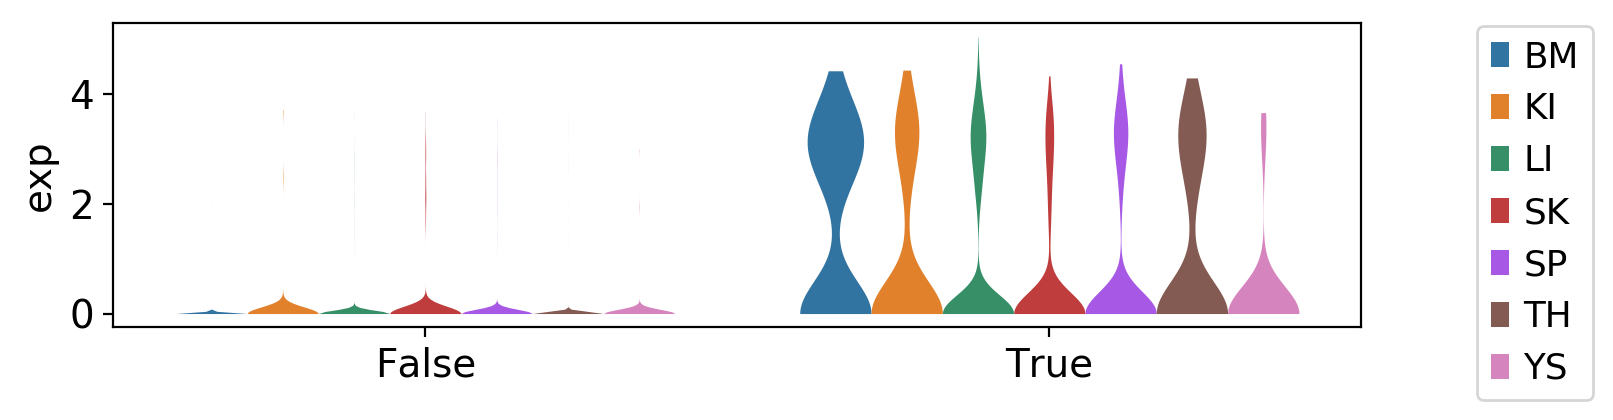

0.69 : NK_organ_True_BM
0.50 : isNK_True
0.28 : organ_BM
0.24 : NK_organ_True_TH
0.20 : NK_organ_False_YS
0.13 : NK_organ_True_LI
0.13 : NK_organ_True_KI
0.12 : NK_organ_False_SK
0.10 : method_5GEX
0.04 : organ_LI
0.04 : organ_TH
0.03 : organ_KI
-0.01 : NK_organ_True_SP
-0.02 : NK_organ_False_SP
-0.04 : organ_SP
-0.09 : NK_organ_False_LI
-0.10 : NK_organ_False_KI
-0.10 : method_3GEX
-0.10 : organ_SK
-0.21 : NK_organ_False_TH
-0.22 : NK_organ_True_SK
-0.24 : organ_YS
-0.41 : NK_organ_False_BM
-0.45 : NK_organ_True_YS
-0.50 : isNK_False


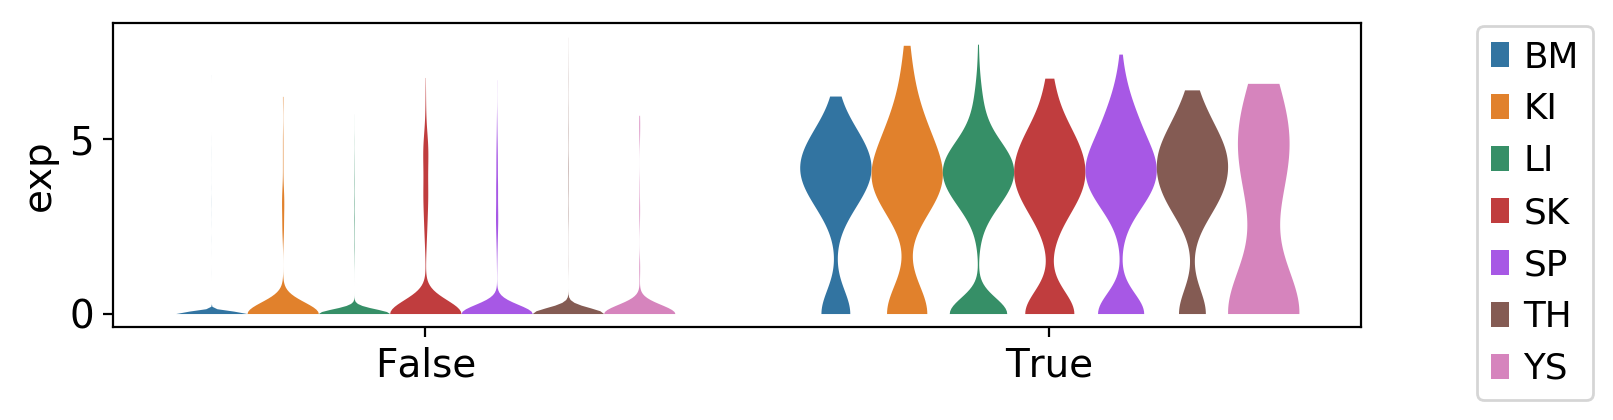

0.76 : isNK_True
0.28 : NK_organ_True_TH
0.25 : NK_organ_True_BM
0.16 : NK_organ_True_SP
0.15 : NK_organ_True_KI
0.09 : NK_organ_True_LI
0.08 : organ_SK
0.08 : NK_organ_False_SK
0.07 : organ_SP
0.05 : organ_TH
0.04 : method_5GEX
0.02 : organ_KI
0.01 : NK_organ_True_SK
0.01 : NK_organ_False_YS
-0.01 : organ_BM
-0.04 : method_3GEX
-0.04 : organ_LI
-0.09 : NK_organ_False_SP
-0.13 : NK_organ_False_LI
-0.14 : NK_organ_False_KI
-0.17 : organ_YS
-0.18 : NK_organ_True_YS
-0.23 : NK_organ_False_TH
-0.25 : NK_organ_False_BM
-0.76 : isNK_False


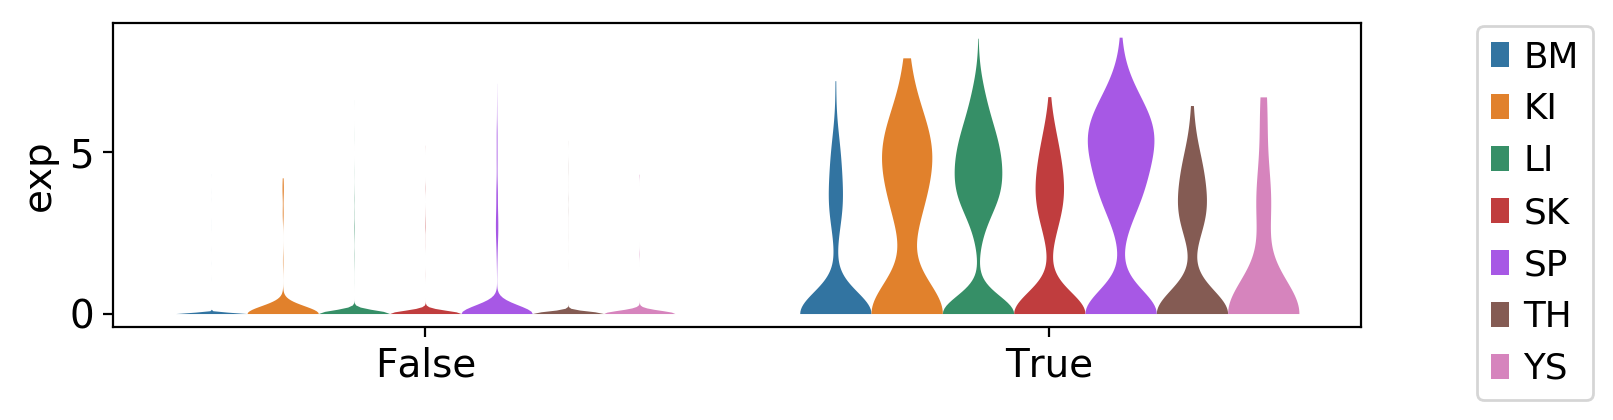

0.59 : NK_organ_True_SP
0.55 : isNK_True
0.46 : NK_organ_True_LI
0.35 : organ_SP
0.30 : NK_organ_True_KI
0.19 : organ_LI
0.12 : organ_KI
0.10 : NK_organ_False_YS
0.09 : NK_organ_False_BM
0.01 : method_5GEX
0.00 : NK_organ_False_TH
-0.01 : method_3GEX
-0.03 : NK_organ_True_SK
-0.05 : NK_organ_False_SK
-0.07 : organ_SK
-0.13 : organ_TH
-0.14 : NK_organ_True_TH
-0.18 : NK_organ_False_KI
-0.22 : organ_YS
-0.23 : organ_BM
-0.24 : NK_organ_False_SP
-0.27 : NK_organ_False_LI
-0.32 : NK_organ_True_BM
-0.32 : NK_organ_True_YS
-0.55 : isNK_False


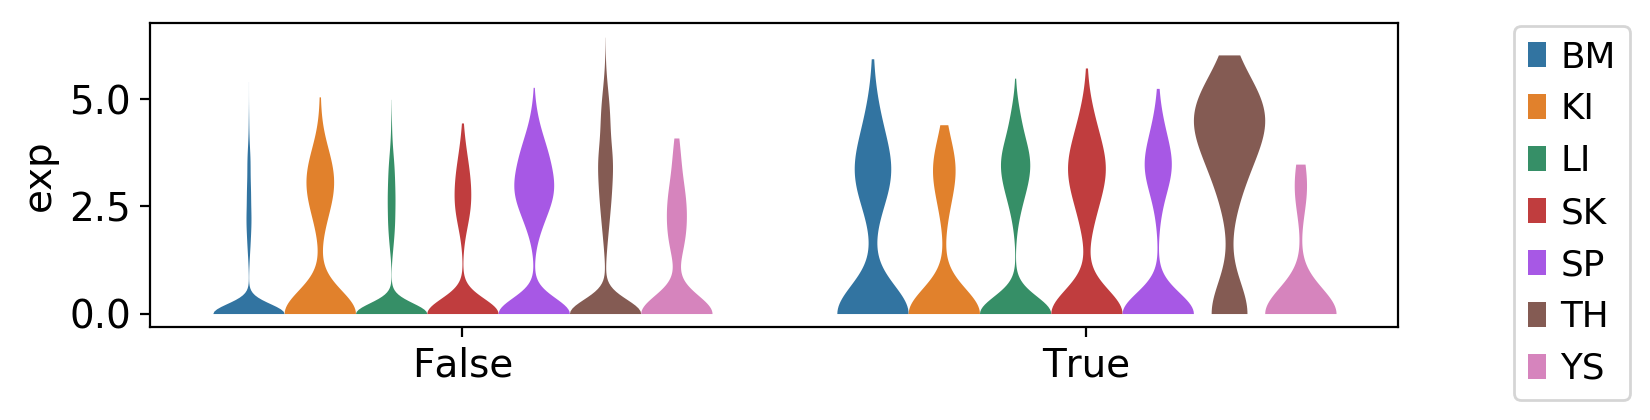

0.61 : NK_organ_True_TH
0.38 : organ_TH
0.30 : NK_organ_False_SP
0.14 : NK_organ_False_YS
0.13 : NK_organ_False_KI
0.12 : isNK_True
0.11 : NK_organ_True_BM
0.10 : organ_SP
0.10 : NK_organ_True_SK
0.09 : NK_organ_True_LI
0.07 : method_5GEX
0.00 : organ_SK
-0.05 : organ_LI
-0.07 : method_3GEX
-0.09 : NK_organ_False_SK
-0.11 : organ_KI
-0.12 : organ_BM
-0.12 : isNK_False
-0.15 : NK_organ_False_LI
-0.20 : NK_organ_True_SP
-0.21 : organ_YS
-0.22 : NK_organ_False_TH
-0.23 : NK_organ_False_BM
-0.24 : NK_organ_True_KI
-0.35 : NK_organ_True_YS


In [185]:
show_violin('NCR1','isNK',adata,LR)
show_violin('XCL2','isNK',adata,LR)
show_violin('IFNG','isNK',adata,LR)
show_violin('COTL1','isNK',adata,LR)

In [187]:
df = adata.obs
df['isNK'] = [str(x) for x in df['anno_TH_predict_major']=='NK']
df['NK_organ'] = [x+'_'+y for x,y in zip(df['isNK'],df['organ'])]
cat = df[['NK_organ','method']]

LR = Ridge()
dummy = pd.get_dummies(cat,drop_first=False)
X_exp = adata.X

LR.fit(dummy,X_exp)

params = list(dummy.columns)

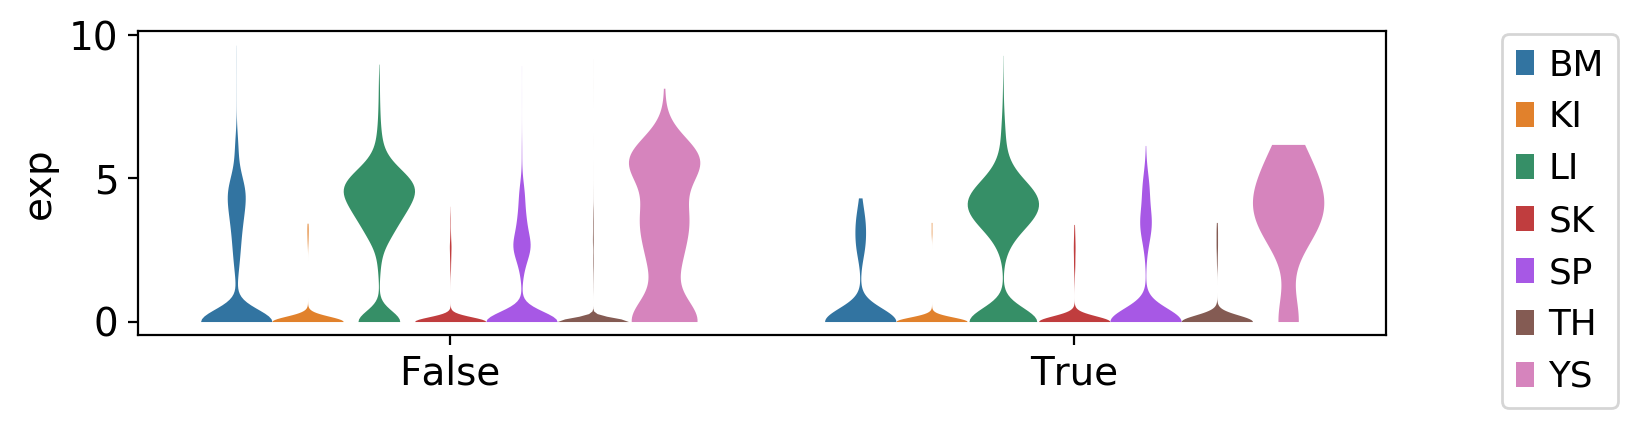

0.55 : organ_LI
0.47 : organ_YS
0.41 : method_3GEX
0.40 : NK_organ_False_LI
0.39 : NK_organ_True_YS
0.17 : NK_organ_False_BM
0.14 : NK_organ_True_LI
0.08 : NK_organ_False_YS
0.01 : isNK_False
-0.01 : isNK_True
-0.02 : organ_BM
-0.02 : NK_organ_True_TH
-0.02 : NK_organ_True_KI
-0.04 : NK_organ_True_SP
-0.05 : NK_organ_False_SP
-0.09 : organ_SP
-0.13 : NK_organ_False_SK
-0.15 : NK_organ_False_TH
-0.17 : organ_TH
-0.18 : NK_organ_True_BM
-0.27 : NK_organ_True_SK
-0.31 : NK_organ_False_KI
-0.34 : organ_KI
-0.41 : organ_SK
-0.41 : method_5GEX


In [191]:
show_violin('HBA1','isNK',adata,LR)

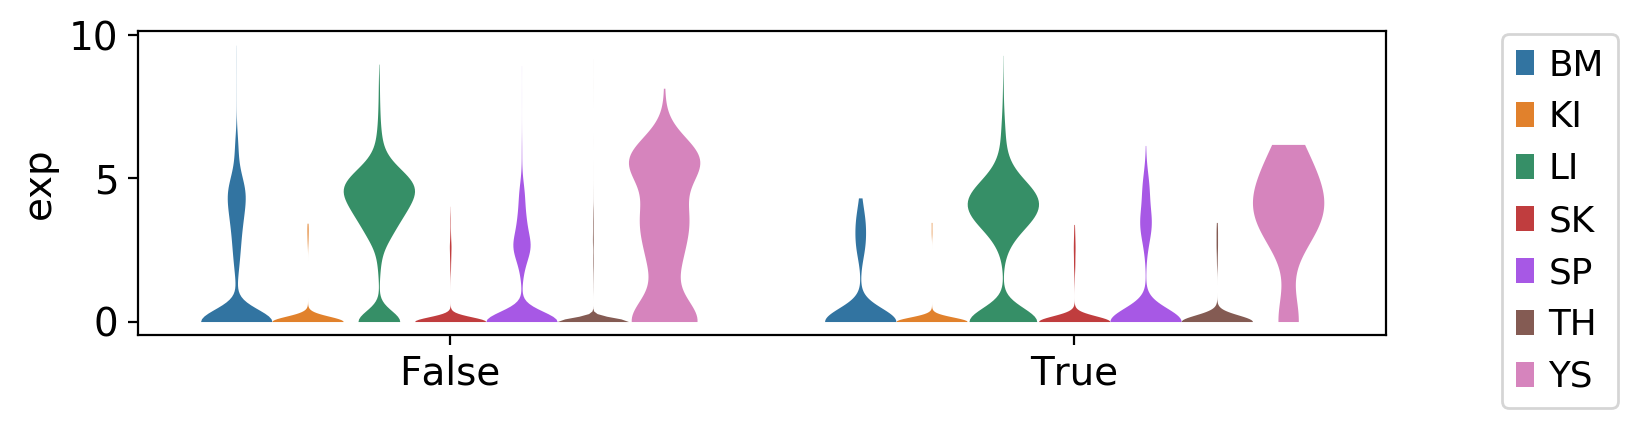

0.96 : NK_organ_False_LI
0.84 : NK_organ_True_YS
0.69 : NK_organ_True_LI
0.56 : NK_organ_False_YS
0.41 : method_3GEX
0.16 : NK_organ_False_BM
-0.14 : NK_organ_False_SP
-0.14 : NK_organ_True_SP
-0.19 : NK_organ_True_TH
-0.20 : NK_organ_True_BM
-0.31 : NK_organ_False_TH
-0.37 : NK_organ_True_KI
-0.41 : method_5GEX
-0.53 : NK_organ_False_SK
-0.64 : NK_organ_False_KI
-0.68 : NK_organ_True_SK


In [189]:
show_violin('HBA1','isNK',adata,LR)

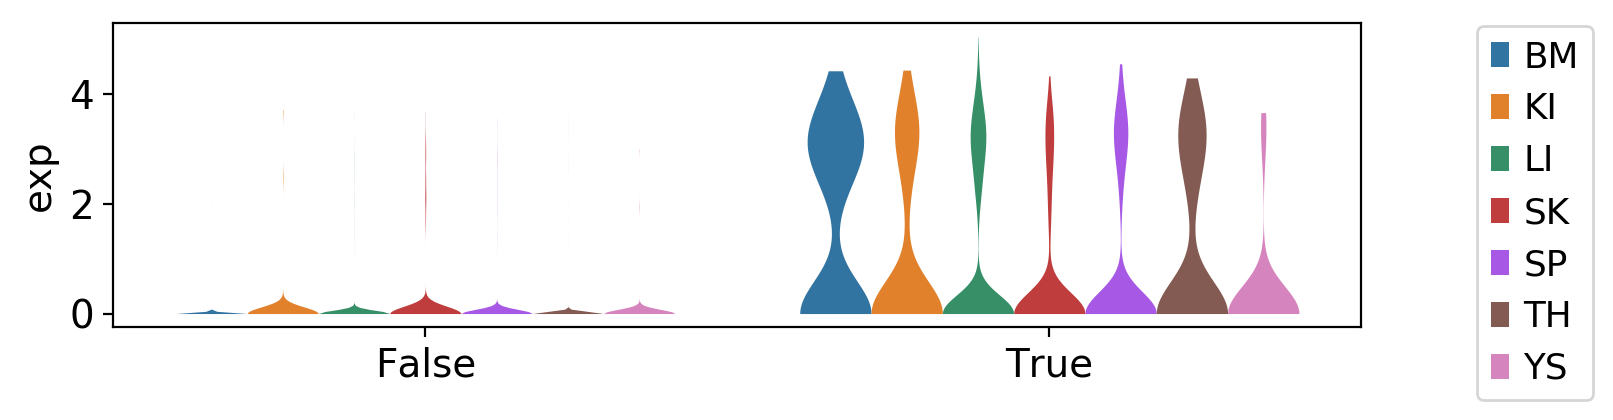

1.46 : NK_organ_True_BM
0.77 : NK_organ_True_TH
0.67 : NK_organ_True_LI
0.65 : NK_organ_True_KI
0.45 : NK_organ_True_SP
0.17 : NK_organ_True_SK
0.10 : method_5GEX
-0.10 : method_3GEX
-0.20 : NK_organ_True_YS
-0.48 : NK_organ_False_SK
-0.54 : NK_organ_False_YS
-0.55 : NK_organ_False_LI
-0.56 : NK_organ_False_SP
-0.56 : NK_organ_False_KI
-0.63 : NK_organ_False_BM
-0.67 : NK_organ_False_TH


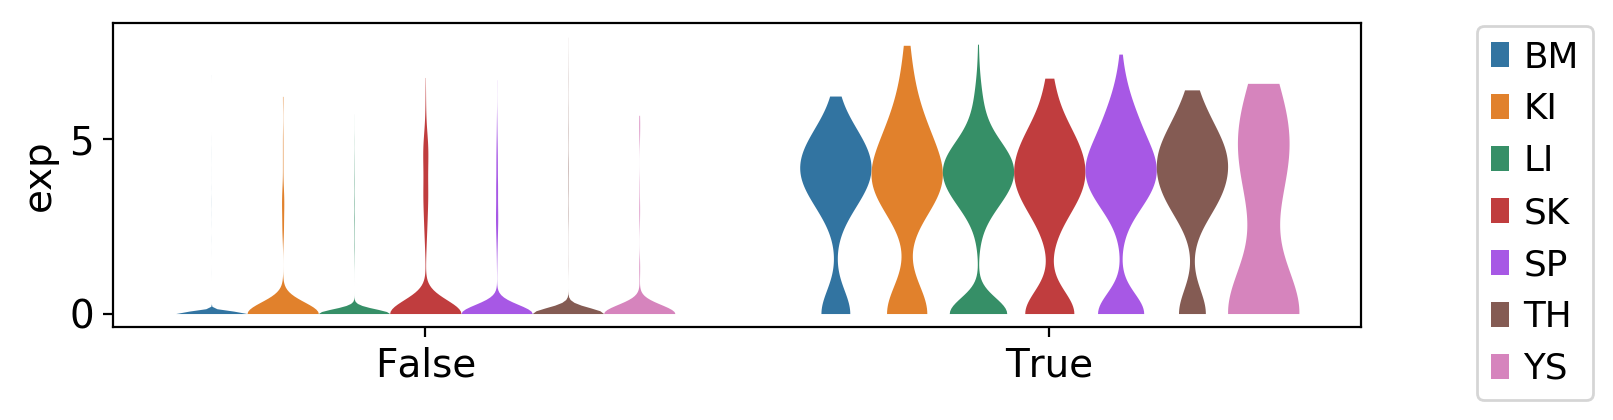

1.08 : NK_organ_True_TH
1.01 : NK_organ_True_BM
0.99 : NK_organ_True_SP
0.93 : NK_organ_True_KI
0.86 : NK_organ_True_SK
0.82 : NK_organ_True_LI
0.40 : NK_organ_True_YS
0.04 : method_5GEX
-0.04 : method_3GEX
-0.60 : NK_organ_False_SK
-0.78 : NK_organ_False_SP
-0.88 : NK_organ_False_KI
-0.91 : NK_organ_False_YS
-0.94 : NK_organ_False_LI
-0.95 : NK_organ_False_TH
-1.02 : NK_organ_False_BM


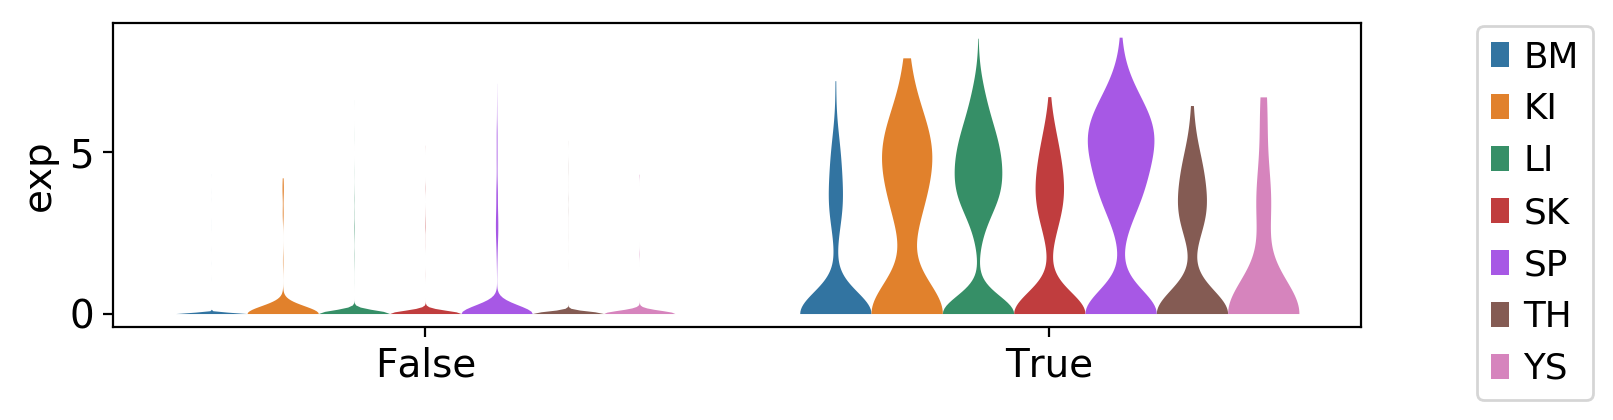

1.49 : NK_organ_True_SP
1.20 : NK_organ_True_LI
0.97 : NK_organ_True_KI
0.45 : NK_organ_True_SK
0.28 : NK_organ_True_TH
0.01 : method_5GEX
-0.00 : NK_organ_True_BM
-0.00 : NK_organ_True_YS
-0.01 : method_3GEX
-0.43 : NK_organ_False_SP
-0.60 : NK_organ_False_KI
-0.63 : NK_organ_False_LI
-0.67 : NK_organ_False_SK
-0.67 : NK_organ_False_YS
-0.68 : NK_organ_False_TH
-0.69 : NK_organ_False_BM


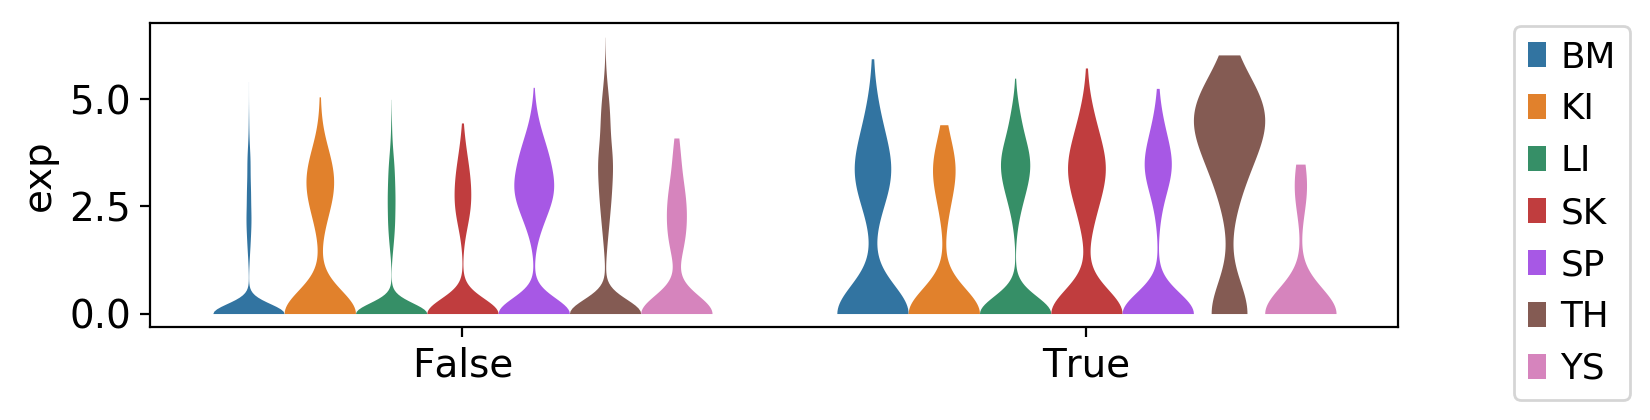

1.10 : NK_organ_True_TH
0.29 : NK_organ_False_SP
0.22 : NK_organ_True_SK
0.16 : NK_organ_True_LI
0.11 : NK_organ_True_BM
0.07 : method_5GEX
0.04 : NK_organ_False_TH
0.01 : NK_organ_True_SP
-0.07 : method_3GEX
-0.10 : NK_organ_False_KI
-0.18 : NK_organ_False_YS
-0.21 : NK_organ_False_SK
-0.23 : NK_organ_True_KI
-0.32 : NK_organ_False_LI
-0.43 : NK_organ_True_YS
-0.46 : NK_organ_False_BM


In [188]:
show_violin('NCR1','isNK',adata,LR)
show_violin('XCL2','isNK',adata,LR)
show_violin('IFNG','isNK',adata,LR)
show_violin('COTL1','isNK',adata,LR)